<a href="https://colab.research.google.com/github/satwika04/Miniproject-/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 2.61 ms (started: 2021-06-19 13:26:22 +00:00)


In [15]:

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


time: 2.21 ms (started: 2021-06-19 14:30:48 +00:00)


In [16]:

target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES=['car','dog']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)



time: 707 ms (started: 2021-06-19 14:30:50 +00:00)


<BarContainer object of 2 artists>

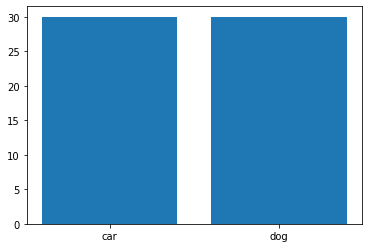

time: 138 ms (started: 2021-06-19 14:30:52 +00:00)


In [17]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=10)


time: 22.3 ms (started: 2021-06-19 14:30:54 +00:00)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{ 'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 41.3 s (started: 2021-06-19 14:30:56 +00:00)


In [20]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

time: 66.6 ms (started: 2021-06-19 14:31:49 +00:00)


In [21]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

time: 6.77 ms (started: 2021-06-19 14:31:50 +00:00)


In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8888888888888888

time: 7.64 ms (started: 2021-06-19 14:31:52 +00:00)


In [23]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [2, 8]])

time: 5.21 ms (started: 2021-06-19 14:31:54 +00:00)


In [ ]:
import pickle 
pickle.dump(clf,open('img_model.p','wb'))


time: 33.4 ms (started: 2021-06-19 13:27:45 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 16.7 ms (started: 2021-06-19 13:27:47 +00:00)


enter urlhttps://th.bing.com/th/id/OIP.grDHtVb2GmKGllhF7NQgDwHaE7?w=235&h=180&c=7&o=5&pid=1.7
(180, 235, 3)
predicted :car


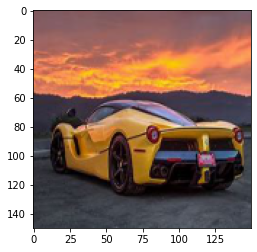

time: 4.16 s (started: 2021-06-19 13:29:55 +00:00)


In [ ]:
flat_data=[]
url=input('enter url')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]


print(f'predicted :{y_out}')